In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.cifar10.load_data()

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape

(50000,)

In [ ]:
classes = ["Airplane" ,"Automobile",	"Bird",	"Cat",	"Deer",	"Dog",	"Frog",	"Horse",	"Ship",	"Truck"]
def plot_image(x,y,index):
  plt.matshow(x[index])
  plt.xlabel(classes[y[index]])

#Artificial Neural Network


In [ ]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(500 , activation  = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
])

ann.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train,y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.8927 - accuracy: 0.3050
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6992 - accuracy: 0.3847
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6099 - accuracy: 0.4209
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5409 - accuracy: 0.4469
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4932 - accuracy: 0.4643


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 295.2911 - accuracy: 0.2792


[295.2911071777344, 0.2791999876499176]

In [ ]:
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = np.array(y_pred)

print("Classification Report : \n" , classification_report(y_test,y_pred))

313/313 [==============================] - 4s 13ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.18      0.86      0.29      1000
           1       0.70      0.29      0.41      1000
           2       0.38      0.09      0.14      1000
           3       0.35      0.07      0.12      1000
           4       0.75      0.00      0.01      1000
           5       0.21      0.52      0.30      1000
           6       0.57      0.01      0.02      1000
           7       0.66      0.18      0.28      1000
           8       0.57      0.39      0.46      1000
           9       0.49      0.37      0.42      1000

    accuracy                           0.28     10000
   macro avg       0.49      0.28      0.25     10000
weighted avg       0.49      0.28      0.25     10000



#Convolutional Neural Network

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32  , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64 , activation = "relu"),
    keras.layers.Dense(10 , activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4797 - accuracy: 0.4676
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1592 - accuracy: 0.5896
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0384 - accuracy: 0.6363
Epoch 4/5
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9592 - accuracy: 0.6648
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8996 - accuracy: 0.6850


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9789 - accuracy: 0.6593


[0.9788983464241028, 0.6593000292778015]

In [ ]:
y_pred = cnn.predict( X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = np.array(y_pred)

313/313 [==============================] - 4s 11ms/step


##Actual Class

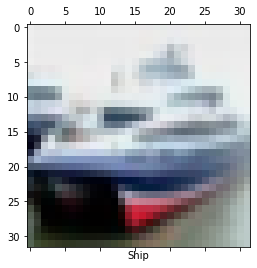

In [ ]:
plot_image(X_test,y_test,1)

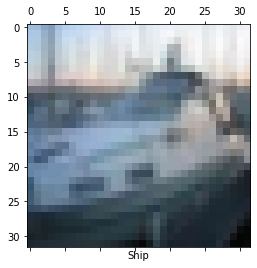

In [ ]:
plot_image(X_test,y_test,2)

##Predicted Class

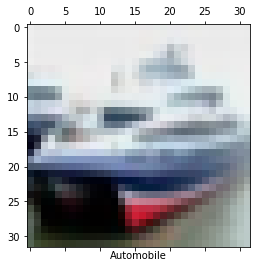

In [ ]:
plot_image(X_test, y_pred, 1)

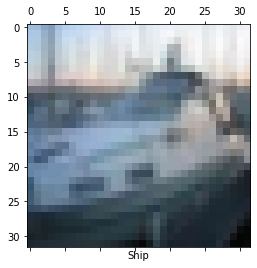

In [ ]:
plot_image(X_test, y_pred, 2)